<a href="https://colab.research.google.com/github/anjusree123/TensorFlow/blob/main/HyperParameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import keras
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler

np.random.seed(42)

In [5]:
pip install -U scikit-learn scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from sklearn.model_selection import GridSearchCV
from keras.constraints import maxnorm

In [13]:
dataset=keras.datasets.mnist

In [15]:
(x_train,y_train),(x_test,y_test)=dataset.load_data()

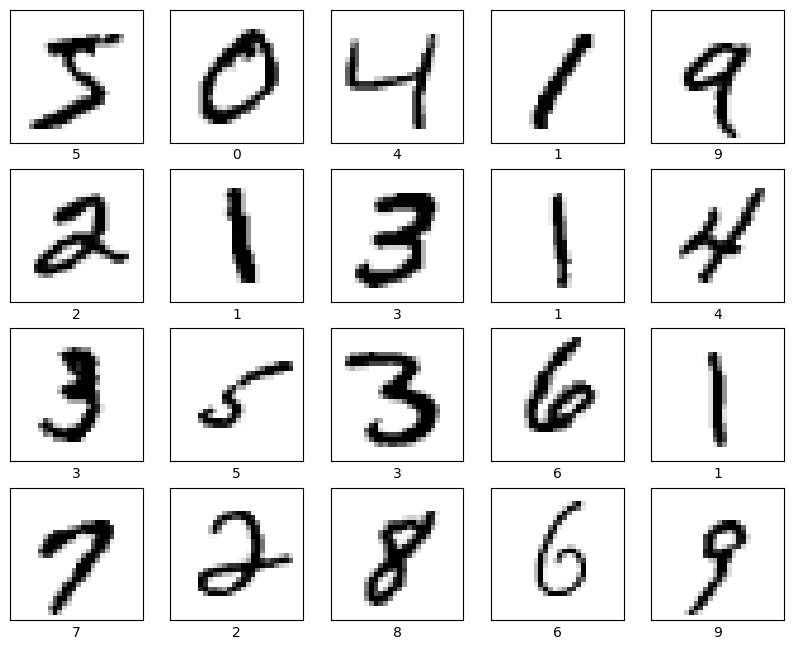

In [16]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(y_train[i])


In [17]:
x_train,x_test=x_train/255.0,x_test/255.0

In [19]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
num_classes=10

In [20]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [21]:
from sklearn.model_selection import train_test_split
x_grid,x_nouse,y_grid,y_nouse=train_test_split(x_train, y_train, test_size=0.9, random_state=42)

In [22]:
input_dim = x_grid.shape[1]

In [23]:
def define_model(dropout_rate=0.0, weight_constraint=0, neurons=10):   
    model = Sequential()
    model.add(Dense(neurons, activation='relu', kernel_initializer='he_uniform', 
        input_dim = input_dim, kernel_constraint=maxnorm(weight_constraint))) 
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='he_uniform', activation='softmax'))
    
    # compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',      
                  metrics=['acc'])
    return model

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=define_model, 
                        verbose=1)

dropout_rate = [0.0, 0.2, 0.4]
weight_constraint = [1, 2, 3]
neurons = [10, 32, 64]
batch_size = [100, 200, 400]
epochs = [1, 5, 10]

param_grid = dict(dropout_rate=dropout_rate, 
                  weight_constraint=weight_constraint,
                  neurons=neurons, batch_size=batch_size, 
                  epochs=epochs)

<ipython-input-25-a4f64c83681e>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=define_model,


In [26]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=16, cv=3)

grid_result = grid.fit(x_grid, y_grid)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 1.1284 - acc: 0.6863
Epoch 2/10
60/60 [==============================] - 0s 5ms/step - loss: 0.3785 - acc: 0.8933
Epoch 3/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2806 - acc: 0.9198
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2213 - acc: 0.9375
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1831 - acc: 0.9505
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1559 - acc: 0.9575
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1287 - acc: 0.9662
Epoch 8/10
60/60 [==============================] - 0s 5ms/step - loss: 0.1130 - acc: 0.9690
Epoch 9/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0936 - acc: 0.9767
Epoch 10/10
60/60 [==============================] - 0s 4ms/step - loss: 0.0847 - acc: 0.9783


In [27]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean = %f (std=%f) with: %r" % (mean, stdev, param))

Best: 0.928500 using {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 10, 'neurons': 64, 'weight_constraint': 2}
Mean = 0.390500 (std=0.030760) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 10, 'weight_constraint': 1}
Mean = 0.383000 (std=0.100450) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 10, 'weight_constraint': 2}
Mean = 0.352833 (std=0.098584) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 10, 'weight_constraint': 3}
Mean = 0.750167 (std=0.024652) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 32, 'weight_constraint': 1}
Mean = 0.697333 (std=0.053467) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 32, 'weight_constraint': 2}
Mean = 0.729500 (std=0.033068) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 32, 'weight_constraint': 3}
Mean = 0.826500 (std=0.022106) with: {'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 1, 'neurons': 64,